# 同构 - 如何判断两个图是否相似？

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## 什么是同构？为什么它有趣？

由于未标记的图可以有多种空间表示，两个图是同构的，如果它们具有相同数量的边、顶点以及相同的边连接性。让我们看一个两个同构图的例子，

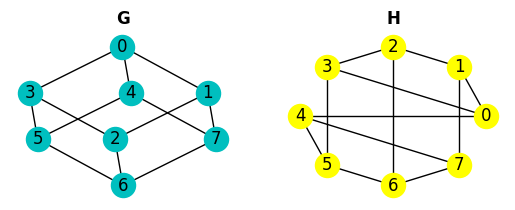

In [2]:
plt.subplot(221)
G = nx.cubical_graph()
nx.draw_spectral(G, with_labels=True, node_color="c")
plt.title("G", fontweight="bold")
H = nx.cubical_graph()
plt.subplot(222)
nx.draw_circular(H, with_labels=True, node_color="yellow")
plt.title("H", fontweight="bold")

plt.show()

这两个图的空间表示非常不同，但它们是相同的图！

### 正式定义

G 和 H 是同构的，如果我们能在 G 和 H 的顶点集之间建立一个双射。

$$ {\displaystyle f\colon N(G)\to N(H)} $$

例如，如果

$v$ 和 $w$ 在 G 中相邻 $\iff$ $f(v)$ 和 $f(w)$ 在 H 中相邻

为了正式证明两个图是同构的，我们需要找到顶点集之间的双射。对于前面的例子，那将是：

$$f(i) = i+1 \hspace{0.5cm} \forall i \in [0, 7]$$

对于小例子，同构可能看起来很容易。但这不是一个简单的问题。对于两个具有 n 个节点的图 G 和 H，有 n! 种可能的双射函数。检查每一种组合对于更大的图来说不是一个可行的选项。事实上，同构是 NP 问题的一部分。这意味着我们不知道任何在多项式时间内运行的算法。

### 应用

图同构问题有很多应用。

- 图像识别：图像可以转换为图，通过找到（子）同构，我们可以比较两张图像是否相似。

- 验证电子电路和通信网络设计的不同表示的等价性。

- 识别化学化合物和蛋白质。

- 指纹、面部和视网膜匹配的算法。

- 社交网络上的聚类算法。

## 同构算法
**朴素方法**

有一些初始属性我们可以检查，以决定是否可能存在同构
- G 和 H 必须具有相同数量的节点和边
- G 和 H 的度序列必须相同

这些是必要条件，但不能保证两个图是同构的。让我们看一个小例子：

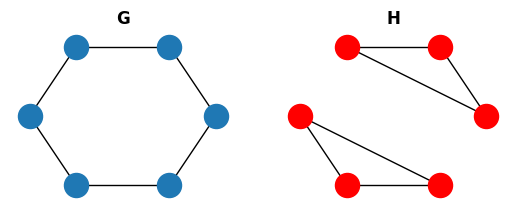

In [3]:
plt.subplot(221)
G = nx.cycle_graph(6)
nx.draw_circular(G)
plt.title("G", fontweight="bold")
plt.subplot(222)
H = nx.union(nx.cycle_graph(3), nx.cycle_graph(3), rename=("s", "d"))
nx.draw_circular(H, node_color="r")
plt.title("H", fontweight="bold")
plt.show()

我们可以使用函数 `nx.faster_could_be_isomorphic()` 来检查 G 和 H 是否具有相同的度序列。

In [4]:
nx.faster_could_be_isomorphic(G, H)

True

这些图显然不是同构的，但它们具有相同的度序列。

我们可以检查的另一个属性是：
- 具有相同数量的特定长度的环，例如三角形。

我们可以使用函数 `nx.fast_could_be_isomorphic()` 来检查图是否具有相同的度和三角形序列。三角形序列包含每个节点所属的三角形数量。

In [5]:
nx.fast_could_be_isomorphic(G, H)

False

这个新属性使我们能够检测到前面例子中的图不是同构的。

我们可以进一步检查：
- 相同数量的最大团。

我们可以使用函数 `nx.could_be_isomorphic()` 来检查图是否具有相同的度、三角形和团序列。团序列包含每个节点所属的最大团数量。

In [6]:
nx.could_be_isomorphic(G, H)

False

再次我们可以检测到 G 和 H 不是同构的。但这些条件不足以说两个图是同构的。让我们看下面的例子：

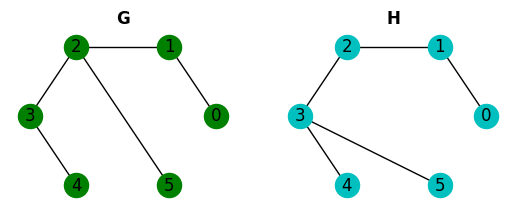

In [7]:
plt.subplot(221)
G = nx.path_graph(5)
G.add_edge(2, 5)
nx.draw_circular(G, with_labels=True, node_color="g")
plt.title("G", fontweight="bold")

plt.subplot(222)
H = nx.path_graph(5)
H.add_edge(3, 5)
nx.draw_circular(H, with_labels=True, node_color="c")
plt.title("H", fontweight="bold")
plt.show()

In [8]:
nx.could_be_isomorphic(G, H)

True

这些图满足所有必要条件，但它们不是同构的。

## 一些在多项式时间内可解的图类
- 树
- 平面图（实际上，平面图同构是 O(log(n))）
- 区间图
- 排列图
- 循环图
- 有界参数图
    - 有界树宽度的图
    - 有界亏格的图
    - 度有界图
    - 特征值重数有界图
    - k-可收缩图（有界度和有界亏格的推广）

让我们看一个例子，我们可以使用同构模块中的函数 *tree_isomorphism()* 来检查两棵树是否同构，时间复杂度为 $O(n*log(n))$。该函数采用分治法，一旦找到每棵树的根节点，就会匹配这两棵树，并返回一个节点匹配列表。

因此，让我们用它来检查一个有 $2^4 - 1$ 个节点的 2 元树是否是一个高度为 3 的平衡二叉树。

In [9]:
t1 = nx.balanced_tree(2, 3)
t2 = nx.full_rary_tree(2, 15)

from networkx.algorithms import isomorphism as iso

print("节点匹配")
iso.tree_isomorphism(t1, t2)

节点匹配


[(0, 0),
 (1, 1),
 (3, 3),
 (7, 7),
 (8, 8),
 (4, 4),
 (9, 9),
 (10, 10),
 (2, 2),
 (5, 5),
 (11, 11),
 (12, 12),
 (6, 6),
 (13, 13),
 (14, 14)]

## 高级算法

<!-- #region -->
### VF2

该算法用于解决图同构和子图同构问题。

VF2 是一种递归算法，在每一步中，我们将当前匹配函数扩展到覆盖更多节点，直到没有更多节点需要匹配。这不是一种暴力搜索方法，因为有一些可行性规则可以避免探索整个递归树。


形式上，我们有一个函数 $ M: s \rightarrow N(G) \times N(H) $。$M$ 是当前状态 $s$ 下 $G$ 和 $H$ 节点子集之间的匹配函数。我们从初始状态 $s_0$ 开始，$M(s_0) = \emptyset$。在每一步中，我们考虑一组节点，将当前状态 $s$ 扩展到下一个状态 $s'$。在这个新状态下，$M(s') = M(s) \cup {(g, h)} , g\in N(G), h\in N(H)$。一致性条件是与 $M(s)$ 相关的部分图 $G$ 和 $H$ 是同构的。有两种类型的可行性检查：
- 句法（图结构）：包括检查一致性条件和 k-前瞻规则，用于提前检查一个一致状态 $s$ 在 k 步后是否有无一致后继状态。
- 语义（属性）。

伪代码：
<!-- #endregion -->

**Match(s):**
    
    输入：中间状态
    
    输出：两个图之间的映射
    
    IF M(s) 覆盖了 H 的所有节点 THEN:
        RETURN M(s)
    ELSE:
        计算 P = {(g, h)...}，即要包含在 M(s) 中的候选节点集。
        FOR 每个 p in P:
            IF 包含 p 到 M(s) 的可行性规则成功 THEN:
                计算状态 s'
                MATCH(s')
           ENDIF
       ENDFOR
       恢复数据结构
    ENDIF


让我们使用 VF2 来检查前一个示例中的图：

In [10]:
G = nx.path_graph(5)
G.add_edge(2, 5)

H = nx.path_graph(5)
H.add_edge(3, 5)

nx.is_isomorphic(G, H)

False

**时间复杂度**
- 最佳情况 $\in \theta(n²)$，如果只探索 $n$ 个状态，例如每个节点只探索一次。
- 最坏情况 $\in \theta(n!n)$，如果必须完全探索所有可能的匹配。


## 最新进展
- VF2++ 和 VF2 Plus。它们在 VF2 算法的基础上进行了一些优化。
- 有一些新算法：QuickSI、GraphQL、TurboISO、BoostISO、CFL-Match、VF3、CECI 和 DAF。


### 参考文献
- Gross J., Yellen J., Anderson M. (2018). *图论及其应用*（第三版）。CRC Press。
- Somkunwar R., Moreshwar Vaze V. *图同构应用的比较研究*。国际计算机应用杂志（0975 – 8887）。第 162 卷 – 第 7 期，（2017 年 3 月）<https://www.ijcaonline.org/archives/volume162/number7/somkunwar-2017-ijca-913414.pdf>
- L. P. Cordella, P. Foggia, C. Sansone, M. Vento, “An Improved Algorithm for Matching Large Graphs”, IEEE Transactions on Pattern Analysis and Machine Intelligence（第 26 卷，第 10 期，2004 年 10 月）<https://ieeexplore.ieee.org/document/1323804>
- <https://en.wikipedia.org/wiki/Graph_isomorphism_problem>